Generating synthetic parking data...

Dataset Preview:
   Slot_1_Distance_cm  Slot_2_Distance_cm  Slot_3_Distance_cm  \
0          118.727006          147.535715          133.919637   
1          129.932924          107.800932           99.359671   
2          102.904181          143.308807          126.066901   
3          135.403629          101.029225          148.194591   
4          141.622132          110.616956          100.909498   
5          109.170225          115.212112          121.485386   
6          121.597251          114.561457          126.711174   
7          106.974693          114.607232          111.981711   
8          122.803499          139.258798          101.980427   
9          125.711722          129.620728           92.787025   

   Parking_Duration  
0  Short (0-30 min)  
1  Short (0-30 min)  
2  Short (0-30 min)  
3  Short (0-30 min)  
4  Short (0-30 min)  
5  Short (0-30 min)  
6  Short (0-30 min)  
7  Short (0-30 min)  
8  Short (0-30 min)  
9  Short 

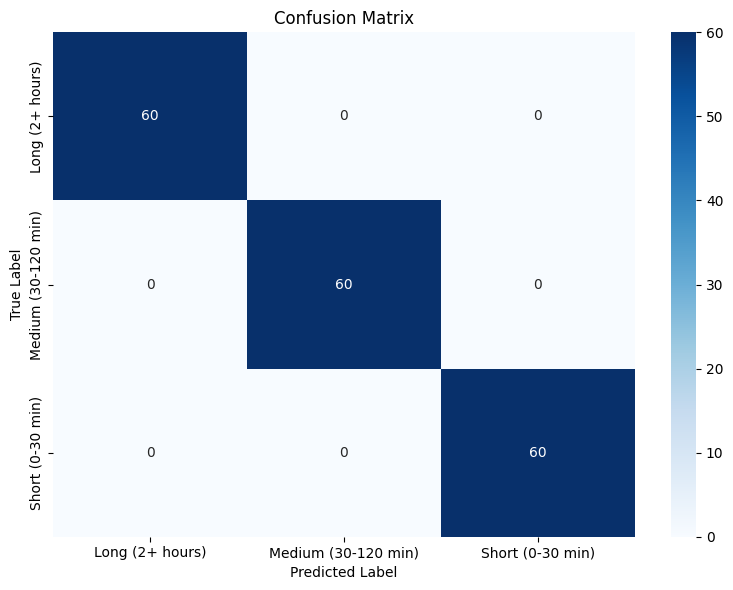

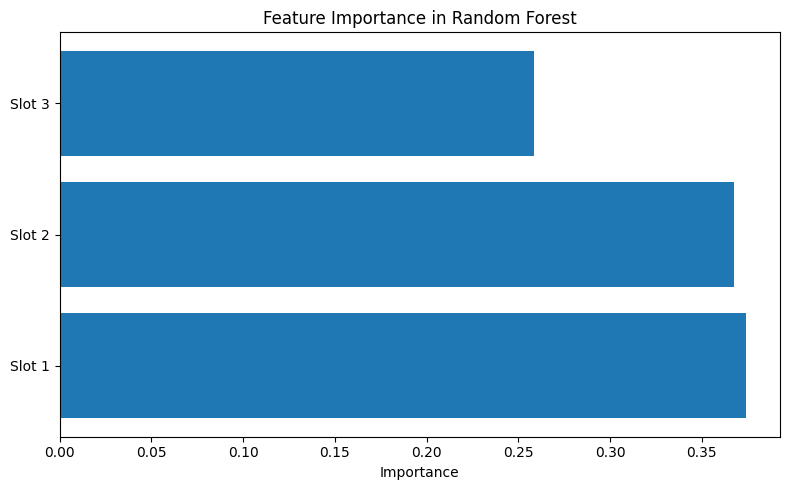


Model training complete!


In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic ultrasonic sensor data for 3 parking slots
np.random.seed(42)

def generate_parking_data(n_samples=300):
    """
    Generate synthetic ultrasonic readings (in cm) for 3 parking slots
    Distance ranges:
    - 10-60 cm: Occupied (car present)
    - 60-100 cm: Partially occupied
    - 100-150 cm: Free (no car)
    """
    data = []
    labels = []

    # Short stay (0-30 min) - mostly free slots, high readings
    for _ in range(n_samples // 3):
        slot1 = np.random.uniform(100, 150)
        slot2 = np.random.uniform(100, 150)
        slot3 = np.random.uniform(90, 150)
        data.append([slot1, slot2, slot3])
        labels.append('Short (0-30 min)')

    # Medium stay (30-120 min) - mixed occupancy
    for _ in range(n_samples // 3):
        slot1 = np.random.uniform(50, 120)
        slot2 = np.random.uniform(50, 120)
        slot3 = np.random.uniform(50, 120)
        data.append([slot1, slot2, slot3])
        labels.append('Medium (30-120 min)')

    # Long stay (2+ hours) - mostly occupied, low readings
    for _ in range(n_samples // 3):
        slot1 = np.random.uniform(10, 60)
        slot2 = np.random.uniform(10, 60)
        slot3 = np.random.uniform(10, 70)
        data.append([slot1, slot2, slot3])
        labels.append('Long (2+ hours)')

    return np.array(data), np.array(labels)

# Generate dataset
print("Generating synthetic parking data...")
X, y = generate_parking_data(n_samples=600)

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=['Slot_1_Distance_cm', 'Slot_2_Distance_cm', 'Slot_3_Distance_cm'])
df['Parking_Duration'] = y

print("\nDataset Preview:")
print(df.head(10))
print(f"\nDataset shape: {df.shape}")
print(f"\nClass distribution:\n{df['Parking_Duration'].value_counts()}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Train Random Forest Classifier
print("\n" + "="*50)
print("Training Random Forest Classifier...")
print("="*50)

rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in leaf node
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nModel Performance:")
print("="*50)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Feature importance
print("\nFeature Importance:")
print("="*50)
feature_importance = pd.DataFrame({
    'Feature': ['Slot 1', 'Slot 2', 'Slot 3'],
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)

# Example predictions
print("\n" + "="*50)
print("Example Predictions:")
print("="*50)

test_cases = [
    ([120, 130, 125], "Mostly free slots"),
    ([30, 25, 35], "Mostly occupied slots"),
    ([80, 90, 75], "Mixed occupancy"),
    ([140, 145, 138], "All slots free"),
    ([15, 20, 18], "All slots occupied")
]

for readings, description in test_cases:
    prediction = rf_model.predict([readings])[0]
    probabilities = rf_model.predict_proba([readings])[0]

    print(f"\nReadings: Slot1={readings[0]}cm, Slot2={readings[1]}cm, Slot3={readings[2]}cm")
    print(f"Description: {description}")
    print(f"Predicted Duration: {prediction}")
    print(f"Confidence: {max(probabilities):.1%}")

# Visualizations (optional - uncomment if running in Jupyter)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Model training complete!")
print("="*50)